# Homework 7: Dynamic Programming
***Bùi Khánh Duy - 20001898***

# I.  Lý thuyết phương pháp
***Trình bày (ngắn gọn) ý tưởng, những yếu tố cơ bản và các bước trong thiết kế giải thuật bằng phương pháp quy hoạch động.***

Phương pháp quy hoạch động là một kỹ thuật giải quyết các bài toán tối ưu bằng cách chia bài toán thành các bài toán con nhỏ hơn, giải quyết các bài toán con này và kết hợp lại để tìm ra lời giải cho bài toán ban đầu. Ý tưởng cơ bản của phương pháp quy hoạch động là sử dụng kết quả của các bài toán con để giải quyết bài toán lớn hơn, với mục đích tối ưu hóa hàm mục tiêu.

Các yếu tố cơ bản của phương pháp quy hoạch động bao gồm:

- Tối ưu hóa hàm mục tiêu: Phương pháp quy hoạch động được sử dụng để giải quyết các bài toán tối ưu, trong đó cần tìm ra lời giải tốt nhất cho hàm mục tiêu.
- Chia bài toán thành các bài toán con: Bài toán ban đầu được chia thành các bài toán con nhỏ hơn, có thể được giải quyết độc lập với nhau.
- Lưu trữ kết quả tính toán: Kết quả tính toán của các bài toán con được lưu trữ để sử dụng trong các bài toán lớn hơn.

Các bước trong thiết kế giải thuật bằng phương pháp quy hoạch động bao gồm:

1. Xác định cấu trúc của bài toán và đặt ra mục tiêu tối ưu.
2. Chia bài toán thành các bài toán con nhỏ hơn.
3. Xác định hàm truy xuất và lưu trữ kết quả tính toán của các bài toán con.
4. Thiết lập quy tắc cập nhật kết quả tính toán của các bài toán con.
5. Giải quyết bài toán ban đầu bằng cách kết hợp các kết quả tính toán của các bài toán con.
6. Kiểm tra và tối ưu hóa giải thuật để đảm bảo tính đúng đắn và hiệu quả của giải thuật.

Các bước trên sẽ được lặp lại cho đến khi đạt được lời giải tối ưu cho bài toán ban đầu.

# II. Lập trình



***Viết chương trình cho các thuật toán đã phân tích và xây dựng (theo bài giảng).***

### 1. Bài toán tìm dãy con đơn điệu tăng dài nhất (longest increasing subsequence)

**Đặt vấn đề:** Bài toán này là gì?

Bài toán đưa ra yêu cầu tìm một dãy con của một dãy số đã cho, sao cho các phần tử trong dãy con này tăng dần theo thứ tự và chiều dài của dãy con này là lớn nhất

**Ví dụ:** cho dãy `A = {3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5}` 

Dãy con đơn điệu tăng dài nhất của dãy số này là `{1, 2, 5, 6}`. Các dãy con khác như `{1, 4, 5, 6}` hoặc `{1, 2, 3, 5}` là các kết quả khác cho đầu vào này.

**Đặt bài toán:** Cho mảng `A` có độ dài $n$, được đánh số từ $0$ đến $n-1$.

**Phương pháp giải:**

- Cách thông thường: Các bước như sau:
    1. Tạo thêm 2 mảng phụ để tính toán, gọi là mảng `B` để lưu vị trí của phần tử nhỏ nhất xuất hiện trước phần tử đang xét, và mảng `C` để tính độ dài của dãy con tăng dài nhất tại vị trí $i$.
    2. Sử dụng 2 vòng for để tính toán: Tại vị trí thứ $i$, ta sẽ duyệt ngược các phần tử trước đó, để tìm ra 1 phần tử thoả mãn 2 tiêu chí sau:
        1. `A[j] < A[i]`
        2. `C[j] max`
        
        Với $j \in [0, i-1]$
        
    3. Lấy ra mảng dãy con tăng dài nhất bằng cách xuất phát từ vị trí có giá trị lớn nhất của mảng `C`.
    
    **Code:**

In [27]:
def LIS_naive(A):
    n = len(A)
    B = [0 for i in range(n)]
    C = [0 for i in range(n)]

    for i in range(n):
        C[i] = 1
        B[i] = i
        for j in range(i-1):
            if A[j] < A[i] and C[j] >= C[i]:
                C[i] = C[j] + 1
                B[i] = j
    # Trace back to find the LIS
    ans = [] # Empty array for answer
    # First find the max value and index in C
    best_j = C.index(max(C))
    while best_j != B[best_j]: # If found index itself => reach the begin
        ans.append(A[best_j])
        best_j = B[best_j]
    # Now add the first element.
    ans.append(A[best_j])
    return ans[::-1] # return reverse array for output

A = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]
print(LIS_naive(A))
    



[3, 4, 5, 6]


{3, 4, 5, 6} là kết quả của bài toán này. 

Đô phức tạp thuật toán là $O(n^2)$ vì phải chạy 2 vòng for. 

Độ phức tạp không gian là $O(n)$

- Phương pháp quy hoạch động: Có các bước như sau:

    1. Tạo 1 mảng phụ $B$ để lưu mảng con tăng dài nhất. Với vị trí $i$ của mảng $B$ tương ứng với dãy con tăng có độ dài $i+1$. Khởi tạo giá trị ban đầu của mảng $B$ là $\infty$.

    2. Duyệt qua lần lượt các phần tử ở mảng $A$. Ở vị trí $A[i]$, ta thực hiện tìm kiếm nhị phân cho phần tử nhỏ nhất mà lớn hơn $A[i]$ trên mảng $B$. Lưu A[i] vào vị trí đó.

**Code:**

In [28]:
import bisect
def LIS_dp(A):
    inf = int(1e9)
    n = len(A)
    B = [inf for i in range(n+1)]
    for i in range(n):
        j = bisect.bisect_left(B, A[i], 0, n) # aka find upper bound.
        if B[j] != A[j]:
            B[j] = A[i]

    ans = []
    for i in B:
        if i == inf:
            break    
        ans.append(i)
    return ans
print(LIS_dp(A))


[3, 4, 5, 6]


Kết quả vẫn là `{3, 4, 5, 6}`.

Cách này sử dụng tìm kiếm nhị phân nên độ phức tạp sẽ là $O(nlogn)$.

Độ phức tạp không gian là $O(n)$.

**Đánh giá tốc độ chạy của 2 phương pháp bằng biểu đồ**

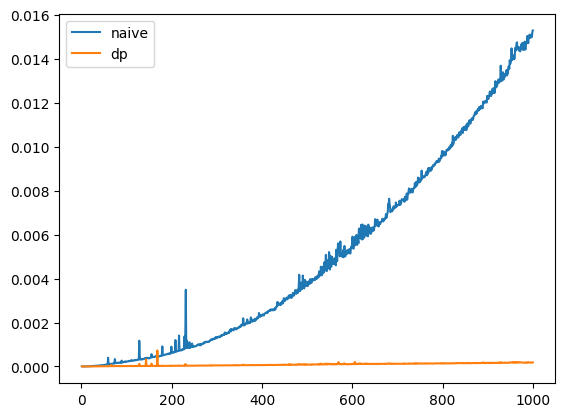

In [29]:
# Create plot to measure run time of naive method and dp method
import time
import random
import matplotlib.pyplot as plt
import numpy as np

def plot():
    naive_time = []
    dp_time = []
    for i in range(1, 1000):
        A = [random.randint(1, 1000) for i in range(i)]
        start = time.time()
        LIS_naive(A)
        end = time.time()
        naive_time.append(end-start)

        start = time.time()
        LIS_dp(A)
        end = time.time()
        dp_time.append(end-start)

    x = np.linspace(1, 1000, 999)
    plt.plot(x, naive_time, label='naive')
    plt.plot(x, dp_time, label='dp')
    plt.legend()
    plt.show()

plot()


Kết quả cho thấy thực sự là thời gian chạy cho thuật toán quy hoạch động nhanh hơn rất nhiều so với thuật toán thông thường.

### 2. Bài toán xếp balo 0-1 (0-1 knapsack)

**Đặt vấn đề**: Bài toán này là gì?

Bài toán đưa ra yêu cầu chọn một tập hợp các vật phẩm có giá trị và khối lượng khác nhau để đặt vào một balo có khối lượng giới hạn. Mỗi vật phẩm có thể được chọn hoặc không được chọn, và mỗi vật phẩm chỉ được chọn một lần.

**Ví dụ**: Cho một balo có khối lượng giới hạn là 10 và danh sách các vật phẩm như sau:

- Vật phẩm 1: có giá trị là 6 và khối lượng là 2
- Vật phẩm 2: có giá trị là 10 và khối lượng là 5
- Vật phẩm 3: có giá trị là 12 và khối lượng là 6
- Vật phẩm 4: có giá trị là 8 và khối lượng là 3

Bài toán yêu cầu tìm cách chọn một tập hợp các vật phẩm để đặt vào balo, sao cho tổng giá trị của các vật phẩm này là lớn nhất và tổng khối lượng của chúng không vượt quá khối lượng giới hạn của balo (tức là 10).

Kết quả của bài toán này là tập hợp các vật phẩm được chọn, trong trường hợp này là vật phẩm 1, 2 và 4, với tổng giá trị = 24 và tổng khối lượng = 10.

**Đặt bài toán**: Cho 2 mảng $V$ và $W$ có độ dài $n$, được đánh số từ $0$ đến $n-1$. Mảng $V$ lưu giá trị của các vật phẩm, mảng $W$ lưu khối lượng của các vật phẩm. Cho một số $m$ là khối lượng giới hạn của balo.

**Cách giải**: 
- Phương pháp ngây thơ (brute force):
    - Tạo ra tất cả các tập con có thể có của tập hợp các vật phẩm. Với mỗi tập con, tính tổng giá trị và tổng khối lượng của các vật phẩm trong tập con đó. Nếu tổng khối lượng nhỏ hơn hoặc bằng $m$ và tổng giá trị lớn hơn giá trị hiện tại, thì cập nhật giá trị hiện tại bằng tổng giá trị của tập con đó.

In [31]:
def knapsack_naive(V, W, m):
    n = len(V)
    ans_subset = []
    ans_value = 0
    for i in range(2**n):
        subset = []
        value = 0
        weight = 0
        for j in range(n):
            if i & (1 << j):
                subset.append(j)
                value += V[j]
                weight += W[j]
        if weight <= m and value > ans_value:
            ans_value = value
            ans_subset = subset
    return ans_value, ans_subset

V = [6, 10, 12, 8]
W = [2, 5, 6, 3]
m = 10
print(knapsack_naive(V, W, m))

(24, [0, 1, 3])


Kết quả của code trả về giá trị tối đa là $24$ với mảng chỉ số các vật phẩm lấy được là `{1, 2, 4}`.

Độ phức tạp của thuật toán này là $O(2^n)$.

Độ phức tạp không gian là $O(n)$.

- Phương pháp quy hoạch động:
    - Tạo ra một mảng 2 chiều $A$ có kích thước $n \times m$. Tại vị trí $A[i][j]$, ta lưu giá trị lớn nhất có thể đạt được với $i$ vật phẩm đầu tiên và khối lượng giới hạn là $j$.
    - Khởi tạo giá trị ban đầu của mảng $A$ là $0$.
    - Duyệt qua lần lượt các vật phẩm từ $0$ đến $n$. Ở vật phẩm thứ $i$, ta duyệt qua lần lượt các khối lượng từ $1$ đến $m$ (bằng biến $j$). Tại mỗi vị trí $A[i][j]$, ta thực hiện tính toán như sau:
        - Nếu $W[i] > j$ (khối lượng của vật phẩm lớn hơn khối lượng giới hạn), thì $A[i][j] = A[i-1][j]$ (giá trị lớn nhất có thể đạt được với $i-1$ vật phẩm và khối lượng giới hạn là $j$).
        - Nếu $W[i] \leq j$ (khối lượng của vật phẩm nhỏ hơn hoặc bằng khối lượng giới hạn), thì $A[i][j] = max(A[i-1][j], A[i-1][j-W[i]] + V[i])$ (giá trị lớn nhất có thể đạt được với $i-1$ vật phẩm và khối lượng giới hạn là $j$, hoặc giá trị lớn nhất có thể đạt được với $i-1$ vật phẩm và khối lượng giới hạn là $j-W[i]$ cộng với giá trị của vật phẩm thứ $i$).
    - Kết quả của bài toán là $A[n][m]$ (giá trị lớn nhất có thể đạt được với $n$ vật phẩm và khối lượng giới hạn là $m$).

**Code:**


In [35]:
def knapsack_dp(V, W, m):
    n = len(V)
    dp = [[0 for j in range(m+1)] for i in range(n+1)]

    # Build table for dp from bottom up
    for i in range(n+1):
        for j in range(m+1):
            if i == 0 or j == 0:
                dp[i][j] = 0
            elif W[i-1] <= j:
                dp[i][j] = max(V[i-1] + dp[i-1][j-W[i-1]], dp[i-1][j])
            else:
                dp[i][j] = dp[i-1][j]

    # Answer of knapsack
    res = dp[n][m] 
    # Trace back to find the subset
    subset = []
    j = m
    for i in range(n, 0, -1):
        if res <= 0:
            break
        if res == dp[i-1][j]:
            continue
        else:
            subset.append(i-1)
            res = res - V[i-1]
            j = j - W[i-1]
    return dp[n][m], subset[::-1]

print(knapsack_dp(V, W, m))


(24, [0, 1, 3])


Kết quả là $24$ với mảng chỉ số các vật phẩm lấy được là `{1, 2, 4}`.

Độ phức tạp của thuật toán này là $O(n\times m)$.

Độ phức tạp không gian là $O(n\times m)$.

Và đây là phần bẽ biểu đồ so sánh thời gian chạy của 2 thuật toán trên với $n$ từ $0$ đến $100$:
(Ở thuật toán 1 thì n sẽ được chạy đến 20, vì nếu n lớn hơn 20 thì thời gian chạy sẽ quá lâu)

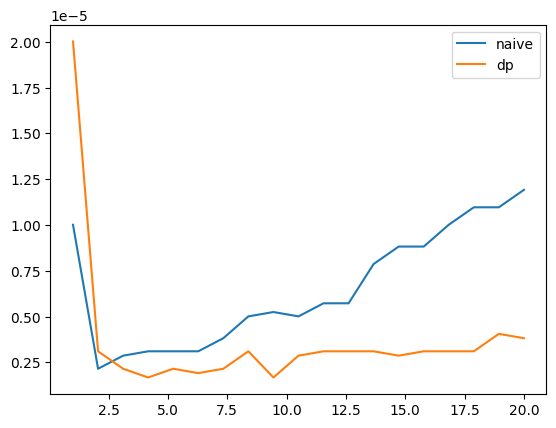

In [37]:
# create plot to measure runtime of naive method and dp method, but limit the size of input for naive to 20
def plot():
    naive_time = []
    dp_time = []
    for i in range(1, 20):
        A = [random.randint(1, 1000) for i in range(i)]
        start = time.time()
        LIS_naive(A)
        end = time.time()
        naive_time.append(end-start)

        start = time.time()
        LIS_dp(A)
        end = time.time()
        dp_time.append(end-start)

    x = np.linspace(1, 20, 19)
    plt.plot(x, naive_time, label='naive')
    plt.plot(x, dp_time, label='dp')
    plt.legend()
    plt.show()
plot()

Chỉ cần với 20 phần tử đã cho ra kết quả chạy rất ấn tượng.

# III. Đặt bài toán, thiết kế, phân tích và triển khai thuật toán

Đây là bài toán mà bản thân em thấy rất khá tâm đắc trong quá trình học thuật toán của mình, vì những kĩ thuật cao siêu của nó. Chính vì để vượt qua bản thân mình nên em đã lựa chọn tìm hiểu nó và viết bài này.

Đây sẽ là những mô tả ngắn gọn của bài toán trước bài báo cáo cuối kì.

## Quy hoạch động chữ số - DP digit

**Định nghĩa**: Quy hoạch động chữ số là phương pháp hiệu quả để giải các bài toán đếm số thoả mãn tính chất về các chữ số của nó.

**Đặt vấn đề**: Có bao nhiêu số $x$ trong khoảng $[a, b]$ thoả mãn 1 điều kiện nào đó.

Đặt $G(x)$ là số các số trong khoảng $[1, x]$ thoả mãn điều kiện đề bài => $G(b) - G(a-1)$ là số các số trong khoảng $[a, b]$ thoả mãn điều kiện đề bài.

Đây chính là cơ sở của quy hoạch động. Mọi bài toán đếm như trên đều có thể được giải bằng đệ quy chữ số (dp digit, hoặc dp chữ số.)

**Ý tưởng chính**:

- Cho số $x$ có $n$ chữ số. Ý tưởng chính của dp chữ số là biểu diễn các chữ số của $x$ thành một mảng $t[]$. Giả sử ta có $t_nt_{n-1}t_{n-2}...t_2t_1$ là biểu diễn thập phân của $x$ với $t_i$ (0 < i <= n) là chữ số thứ $i$ từ phải sang. Chữ số bên trái nhất $t_n$ là chữ số có trọng số lớn nhất.

- Giờ, sau khi biểu diễn số đã cho theo cách này, ta sinh ra các số nhỏ hơn số đã cho và đồng thời tính toán bằng DP, nếu số đó thoả mãn tính chất đã cho. Ta bắt đầu sinh ra các số có số chữ số = 1 và sau đó lần lượt đến khi số chữ số = n. Các số có số chữ số ít hơn n có thể được phân tích bằng cách đặt các chữ số bên trái nhất là 0.

**Ví dụ**:
Cho 2 số nguyên $a$ và $b$. In ra tổng các chữ số xuất hiện trong các số nguyên trong khoảng $[a, b]
Ví dụ: $a = 5$ và $b = 11$, kết quả là $38$ $(5 + 6 + 7 + 8 + 9 + 1 + 0 + 1 + 1)$
Ràng buộc: $1 \leq a \leq b \leq 10^{18}$


Now we see that if we have calculated the answer for state having n-1 digits, i.e., tn-1 tn-2 … t2 t1 and we need to calculate answer for state having n digits tn tn-1 tn-2 … t2 t1. So, clearly, we can use the result of the previous state instead of re-calculating it. Hence, it follows the overlapping property.
Let’s think for a state for this DP
Our DP state will be dp(idx, tight, sum)

Để giải quyết bài toán, ta tính xem trong trường hợp đã có $n-1$ chữ số ($t_{n-1}t_{n-2}...t_2t_1$) thì $n$ chữ số ($t_nt_{n-1}t_{n-2}...t_2t_1$) giải quyết như thế nào?

Bài toán sẽ được giải bằng cách sử dụng bài toán con (trường hợp trước đó) thay vì tính lại. Vì vậy, nó sẽ có tính chất trùng lặp. 

Hàm quy hoạch động sẽ là `dp(idx, tight, sum)`.

1. `idx` là chỉ số của chữ số đang xét (từ phải sang). Ví dụ: `idx = 3` thì chữ số đang xét là $t_3$.


2. `tight`: Sẽ cho biết khoảng chữ số hiện tại có bị giới hạn hay không. Nếu khoảng chữ số hiện tại không bị giới hạn thì nó sẽ nằm trong khoảng từ 0 đến 9 (bao gồm cả 0 và 9), nếu không thì nó sẽ nằm trong khoảng từ 0 đến $t_{idx}$ (bao gồm cả 0 và $t_{idx}$).
    Ví dụ: giới hạn là $3245$ và cần tính $G(3245)$
    ```
    index: 4 3 2 1
    digits: 3 2 4 5
    ```

***Khoảng không bị giới hạn***: 

Giả sử số đã được tạo ra là: 3 1 * * ( * là chỗ trống, nơi mà các chữ số được chèn vào để tạo thành số nguyên).
```
  index  : 4 3 2 1  
  digits : 3 2 4 5
 generated integer: 3 1 _ _ 
 ```

Xét chỉ số 2, ta thấy nó có không bị giới hạn. Vì vậy, nó có thể có các chữ số từ 0 đến 9 (bao gồm cả 0 và 9).

Với khoảng không bị giới hạn, `tight = 0`.

***Khoảng bị giới hạn***:
Giả sử số đã được tạo ra là: 3 2 * * ( * là chỗ trống, nơi mà các chữ số được chèn vào để tạo thành số nguyên).
```
  index  : 4 3 2 1  
  digits : 3 2 4 5
 generated integer: 3 2 _ _ 
 ```

Xét chỉ số 2, ta thấy nó có bị giới hạn. Vì vậy, nó chỉ có thể có các chữ số từ 0 đến 4 (bao gồm cả 0 và 4).

Với khoảng bị giới hạn, `tight = 1`.

3. `sum`: 
  - tổng các chữ số
  - Giá trị lớn nhất của `sum` = 9 * 18 = 162, tương ứng với 18 chữ số.


***Quan hệ trạng thái***:


Ý tưởng: Xây dựng dp bằng phương pháp top-down. Giả sử ta đang ở chữ số có chỉ số `idx`. Vì vậy, ban đầu tổng sẽ là 0. Do đó, ta sẽ điền chữ số tại chỉ số `idx` bằng các chữ số trong khoảng cho phép của nó. Giả sử khoảng của nó là từ 0 đến $k$ ($k \leq 9$, phụ thuộc vào giá trị của `tight`) và lấy kết quả từ trạng thái tiếp theo có chỉ số `idx-1` và tổng = tổng trước đó + chữ số đã chọn.

```cpp
int ans = 0;
for (int i=0; i<=k; i++) {
   ans += state(idx-1, newTight, sum+i)
}

state(idx,tight,sum) = ans;
```

***Tính giá trị `newTight` như thế nào?***

The new tight value from a state depends on its previous state. If tight value form the previous state is 1 and the digit at idx chosen is digit[idx](i.e the digit at idx in limiting integer) , then only our new tight will be 1 as it only then tells that the number formed till now is prefix of the limiting integer. 

Giá trị `newTight` của 1 trạng thái phụ thuộc vào trạng thái trước đó. Nếu `tight` trước = 1 và chữ số tại chỉ số `idx` được chọn là `digit[idx]` (tức là chữ số tại chỉ số `idx` trong số nguyên giới hạn), thì giá trị `newTight` là 1, vì chỉ khi đó nó cho biết rằng số được tạo ra cho đến nay là tiền tố của số nguyên giới hạn.

```cpp

// digitTaken is the digit chosen
// digit[idx] is the digit in the limiting 
//            integer at index idx from right
// previouTight is the tight value form previous 
//              state

newTight = previousTight & (digitTake == digit[idx])
```

#### Code cài đặt:

In [ ]:
# Memoization for the state results
dp = [[[-1 for i in range(2)] for j in range(180)]for k in range(20)]

# Stores the digits in x in a list digit
def getDigits(x, digit):
	while x:
		digit.append(x % 10)
		x //= 10
		
# Return sum of digits from 1 to integer in digit list
def digitSum(index, sumof, tight, digit):

	# Base case
	if index == -1:
		return sumof
	
		# Checking if already calculated this state
	if dp[index][sumof][tight] != -1 and tight != 1:
		return dp[index][sumof][tight]
	ret = 0
	
	# Calculating range value
	k = digit[index] if tight else 9
	for i in range(0, k+1):
	
		# Calculating newTight value for nextstate
		newTight = tight if digit[index] == i else 0
		
		# Fetching answer from next state
		ret += digitSum(index-1, sumof+i, newTight, digit)
	if not tight:
		dp[index][sumof][tight] = ret
	return ret

# Returns sum of digits in numbers from a to b
def rangeDigitSum(a, b):
	digitA = []
	
	# Storing digits of a-1 in digitA
	getDigits(a-1, digitA)
	
	# Finding sum of digits from 1 to "a-1" which is passed as digitA
	ans1 = digitSum(len(digitA)-1, 0, 1, digitA)
	digitB = []
	
	# Storing digits of b in digitB
	getDigits(b, digitB)
	
	# Finding sum of digits from 1 to "b" which is passed as digitB
	ans2 = digitSum(len(digitB)-1, 0, 1, digitB)
	return ans2-ans1


a, b = 123, 1024
print("digit sum for given range: ", rangeDigitSum(a, b))


**Độ phức tạp thời gian**:

Có tổng cộng $idx*sum*tight$ trạng thái và phải duyệt từ 0-9 cho mỗi trạng thái. Vậy nên độ phức tạp thời gian = $O(10*idx*sum*tight)$. Ở đây, ta thấy `tight = 2` và `idx` có thể là tối đa 18 cho số nguyên không dấu 64 bit và hơn nữa, tổng sẽ là tối đa $9*18 \sim 200$. Vì vậy, tổng cộng ta có $10*18*200*2 \sim 10^5$ lần lặp mà có thể thực hiện trong 0.01 giây.

**Độ phức tạp không gian**:

$O(d*sum*tight)$ với mảng `dp` cỡ $d*sum*tight$, với d = số chữ số, sum = tổng các chữ số và tight = giá trị boolean cho biết chữ số hiện tại có bị giới hạn bởi chữ số trong số hay không.


# Tham khảo:

- https://hoclen.top/home/course/quy-hoach-dong-chu-so/13#:~:text=Quy%20hoạch%20động%20chữ%20số%20là%20phương%20pháp%20hiệu%20quả,viết%20bằng%20C%2B%2B%20và%20Pascal.
- https://codeforces.com/blog/entry/53960
- https://www.geeksforgeeks.org/digit-dp-introduction/